# Data Analyst Position Case Study




## Data cleaning and manipulation using Python

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

# Pretty display for notebooks
%matplotlib inline
sns.set(style='dark', color_codes = True, palette="magma")

In [2]:
# Load the Census dataset
hours = pd.read_csv("Use Case.csv")
Engineering = pd.read_csv("Engineering.csv")
# Success - Display the first record
display(hours.head(n=10))

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,Period_From,Period_To,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1WK2855,Under Development,EG_02,20.0,2022_W27,9.0,24.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1WK1339,Under Development,EG_02,28.0,2022_W26,12.0,14.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1WK1418,Under Development,EG_02,3.0,2022_W30,21.0,12.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1WK1304,Under Development,EG_02,28.0,2022_W25,19.0,30.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1WK1376,Under Acquisition,EG_02,4.0,2022_W26,6.0,25.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1WK1340,Under Acquisition,EG_02,5.0,2022_W25,32.0,2.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1WK1622,Under Development,EG_02,8.0,2022_W29,40.0,31.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1WK1822,Under Development,EG_02,15.0,2022_W27,28.0,16.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1WK1206,Under Development,EG_02,7.0,2022_W25,38.0,17.0,NaN,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9WK1626,Open,EG_02,16.0,2022_W29,5.0,38.0,Overheads,2022_W24,2022_W42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hours.shape

(92092, 26)

In [4]:
hours.columns

Index(['Project Code', 'Project_Status', 'Calendar', 'Hours', 'Week',
       'Forecasted hours', 'Budget Hours', 'Service type', 'Period_From',
       'Period_To', 'Cost Rate', 'Department', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
to_drop = ['Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
hours.drop(to_drop, inplace=True, axis=1)
hours.head()

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,Period_From,Period_To,Cost Rate,Department
0,1WK2855,Under Development,EG_02,20.0,2022_W27,9.0,24.0,NaN,2022_W24,2022_W42,33.32,Camera
1,1WK1339,Under Development,EG_02,28.0,2022_W26,12.0,14.0,NaN,2022_W24,2022_W42,33.32,Camera
2,1WK1418,Under Development,EG_02,3.0,2022_W30,21.0,12.0,NaN,2022_W24,2022_W42,33.32,Camera
3,1WK1304,Under Development,EG_02,28.0,2022_W25,19.0,30.0,NaN,2022_W24,2022_W42,33.32,Camera
4,1WK1376,Under Acquisition,EG_02,4.0,2022_W26,6.0,25.0,NaN,2022_W24,2022_W42,33.32,Camera


In [6]:
hours.dtypes

Project Code         object
Project_Status       object
Calendar             object
Hours               float64
Week                 object
Forecasted hours    float64
Budget Hours        float64
Service type         object
Period_From          object
Period_To            object
Cost Rate           float64
Department           object
dtype: object

### Handling Missing Data

In [7]:
hours.isnull().sum()

Project Code        11743
Project_Status      11743
Calendar            11743
Hours               11743
Week                11743
Forecasted hours    11743
Budget Hours        11743
Service type        81699
Period_From         11743
Period_To           11743
Cost Rate           11743
Department          11743
dtype: int64

In [8]:
bool = pd.isnull(hours['Service type'])

hours[bool]

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,Period_From,Period_To,Cost Rate,Department
0,1WK2855,Under Development,EG_02,20.0,2022_W27,9.0,24.0,NaN,2022_W24,2022_W42,33.32,Camera
1,1WK1339,Under Development,EG_02,28.0,2022_W26,12.0,14.0,NaN,2022_W24,2022_W42,33.32,Camera
2,1WK1418,Under Development,EG_02,3.0,2022_W30,21.0,12.0,NaN,2022_W24,2022_W42,33.32,Camera
3,1WK1304,Under Development,EG_02,28.0,2022_W25,19.0,30.0,NaN,2022_W24,2022_W42,33.32,Camera
4,1WK1376,Under Acquisition,EG_02,4.0,2022_W26,6.0,25.0,NaN,2022_W24,2022_W42,33.32,Camera
...,...,...,...,...,...,...,...,...,...,...,...,...
92087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
bool = pd.isnull(hours['Project Code'])

hours[bool]

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Service type,Period_From,Period_To,Cost Rate,Department
80349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
92087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
hours = hours.drop('Service type', axis=1)
hours = hours.dropna()

In [11]:
hours.isnull().sum()

Project Code        0
Project_Status      0
Calendar            0
Hours               0
Week                0
Forecasted hours    0
Budget Hours        0
Period_From         0
Period_To           0
Cost Rate           0
Department          0
dtype: int64

In [12]:
hours.shape

(80349, 11)

In [13]:
hours.head()

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Period_From,Period_To,Cost Rate,Department
0,1WK2855,Under Development,EG_02,20.0,2022_W27,9.0,24.0,2022_W24,2022_W42,33.32,Camera
1,1WK1339,Under Development,EG_02,28.0,2022_W26,12.0,14.0,2022_W24,2022_W42,33.32,Camera
2,1WK1418,Under Development,EG_02,3.0,2022_W30,21.0,12.0,2022_W24,2022_W42,33.32,Camera
3,1WK1304,Under Development,EG_02,28.0,2022_W25,19.0,30.0,2022_W24,2022_W42,33.32,Camera
4,1WK1376,Under Acquisition,EG_02,4.0,2022_W26,6.0,25.0,2022_W24,2022_W42,33.32,Camera


In [14]:
hours.describe()

,Hours,Forecasted hours,Budget Hours,Cost Rate
count,80349.000000,80349.000000,80349.000000,8.034900e+04
mean,22.152024,20.466266,20.466677,3.332000e+01
std,15.198905,11.521039,11.531718,1.962531e-11
min,1.000000,1.000000,1.000000,3.332000e+01
25%,8.000000,10.000000,10.000000,3.332000e+01
50%,20.000000,20.000000,20.000000,3.332000e+01
75%,40.000000,30.000000,30.000000,3.332000e+01
max,66.000000,40.000000,40.000000,3.332000e+01


### Handle Duplicated Values

In [15]:
dupes = hours.duplicated()

dupes.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [16]:
sum(dupes)

9

In [17]:
hours = hours.drop_duplicates()

hours.shape

(80340, 11)

In [18]:
hours[['Hours', 'Forecasted hours', 'Budget Hours', 'Cost Rate']] = hours[['Hours', 'Forecasted hours', 'Budget Hours', 'Cost Rate']].astype(int)

hours.dtypes

Project Code        object
Project_Status      object
Calendar            object
Hours                int32
Week                object
Forecasted hours     int32
Budget Hours         int32
Period_From         object
Period_To           object
Cost Rate            int32
Department          object
dtype: object

In [19]:
hours.head()

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Period_From,Period_To,Cost Rate,Department
0,1WK2855,Under Development,EG_02,20,2022_W27,9,24,2022_W24,2022_W42,33,Camera
1,1WK1339,Under Development,EG_02,28,2022_W26,12,14,2022_W24,2022_W42,33,Camera
2,1WK1418,Under Development,EG_02,3,2022_W30,21,12,2022_W24,2022_W42,33,Camera
3,1WK1304,Under Development,EG_02,28,2022_W25,19,30,2022_W24,2022_W42,33,Camera
4,1WK1376,Under Acquisition,EG_02,4,2022_W26,6,25,2022_W24,2022_W42,33,Camera


In [20]:
hours.corr()

,Hours,Forecasted hours,Budget Hours,Cost Rate
Hours,1.000000,-0.003096,0.000269,NaN
Forecasted hours,-0.003096,1.000000,-0.002177,NaN
Budget Hours,0.000269,-0.002177,1.000000,NaN
Cost Rate,NaN,NaN,NaN,NaN


<Figure size 576x360 with 0 Axes>

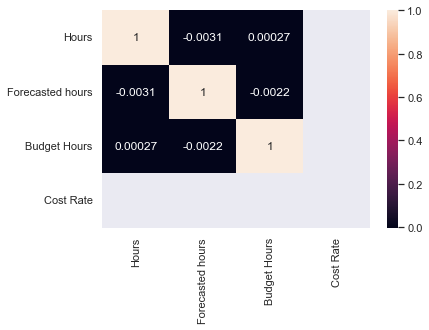

<Figure size 576x360 with 0 Axes>

In [21]:
sns.heatmap(hours.corr(),annot=True)
plt.figure(figsize=(8,5))

In [22]:
Engineering.isnull().sum()

Ticket Number      0
Project Code       0
Start Date         0
End Date           0
Stage              0
Site             770
Severity           0
Ticket Origin      0
dtype: int64

In [23]:
Engineering['Site'] = Engineering['Site'].fillna('Not Assigned')
Engineering.isnull().sum()

Ticket Number    0
Project Code     0
Start Date       0
End Date         0
Stage            0
Site             0
Severity         0
Ticket Origin    0
dtype: int64

In [24]:
dupees = Engineering.duplicated()

dupees.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [25]:
sum(dupees)

0

In [26]:
Engineering.set_axis(['Ticket_Number', 'Project_Code', 'Start_Date', 'End_Date', 'Stage',
       'Site', 'Severity', 'Ticket_Origin'], axis='columns', inplace=True)

Engineering['Start_Date']=pd.to_datetime(Engineering['Start_Date'])

## Identify outliers and explain data treatment steps

In [27]:
cat_features=[i for i in hours.columns if hours.dtypes[i]=='object']
cat_features

['Project Code',
 'Project_Status',
 'Calendar',
 'Week',
 'Period_From',
 'Period_To',
 'Department']

In [28]:
num_features=[i for i in hours.columns if hours.dtypes[i]!='object']
num_features

['Hours', 'Forecasted hours', 'Budget Hours', 'Cost Rate']

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='Hours'>

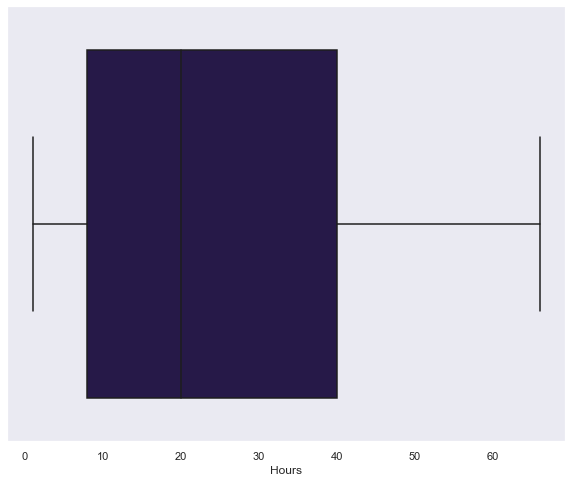

In [29]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(hours['Hours'],
            orient = 'v')

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='Forecasted hours'>

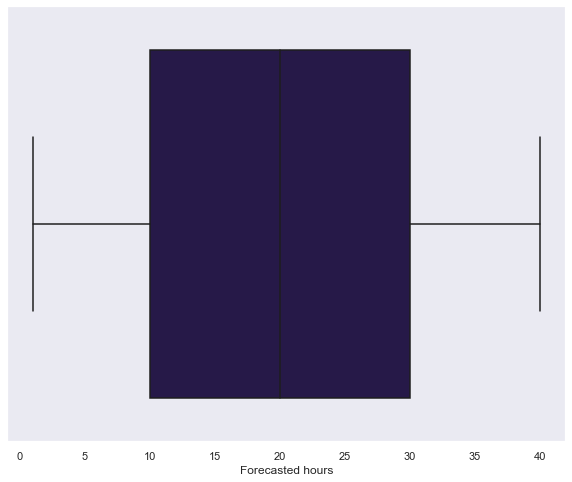

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(hours['Forecasted hours'],
            orient = 'v')

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Eslam\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='Budget Hours'>

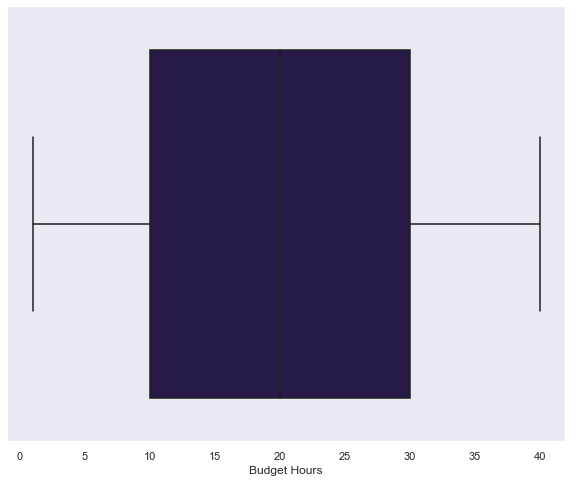

In [31]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(hours['Budget Hours'],
            orient = 'v')

In [32]:
#Count of Outliers
def count_outliers(Data,col):
        q1 = Data[col].quantile(0.25,interpolation='nearest')
        q2 = Data[col].quantile(0.5,interpolation='nearest')
        q3 = Data[col].quantile(0.75,interpolation='nearest')
        q4 = Data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if Data[col].min() > LLP and Data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = Data[Data[col]<LLP][col].size
            y = Data[Data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in num_features:
    count_outliers(hours,i)

No outliers in Hours
No outliers in Forecasted hours
No outliers in Budget Hours
There are outliers in Cost Rate
Count of outliers are: 0


## Identify trends and patterns

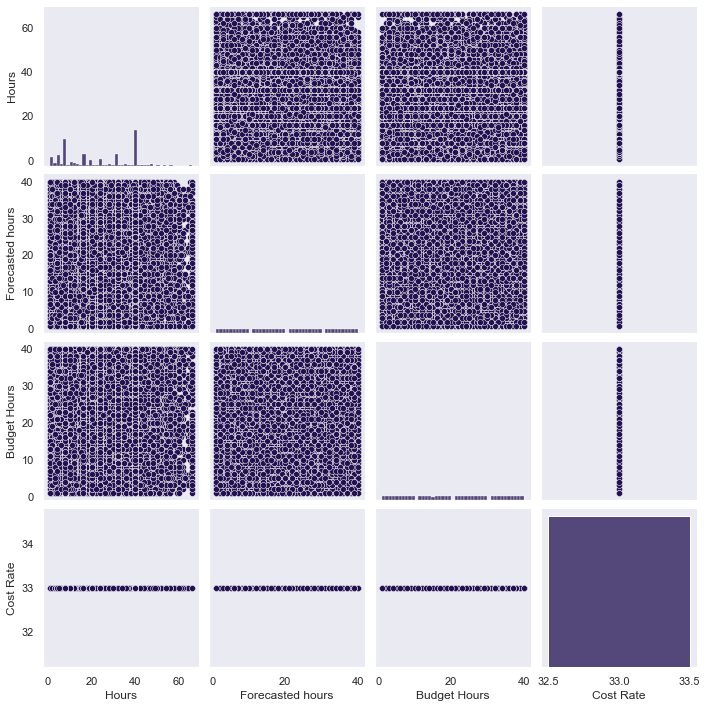

In [33]:
sns.pairplot(hours)

In [34]:
Engineering.head()

,Ticket_Number,Project_Code,Start_Date,End_Date,Stage,Site,Severity,Ticket_Origin
0,Tict1,0WK1000,2022-03-17,9/1/2022,Closed,Russia,Red,Customer
1,Tict2,0WK1000,2022-08-08,10/27/2022,Closed,Russia,Orange,Quality
2,Tict3,0WK1000,2022-06-30,10/31/2022,Closed,Russia,Green,Customer
3,Tict4,0WK1000,2022-01-31,9/26/2022,Under Implementation,Russia,Green,Quality
4,Tict5,0WK1000,2022-05-23,10/3/2022,Closed,Russia,Orange,Supplier


In [35]:
Engineering['month']=Engineering['Start_Date'].dt.month
Engineering.head()

,Ticket_Number,Project_Code,Start_Date,End_Date,Stage,Site,Severity,Ticket_Origin,month
0,Tict1,0WK1000,2022-03-17,9/1/2022,Closed,Russia,Red,Customer,3
1,Tict2,0WK1000,2022-08-08,10/27/2022,Closed,Russia,Orange,Quality,8
2,Tict3,0WK1000,2022-06-30,10/31/2022,Closed,Russia,Green,Customer,6
3,Tict4,0WK1000,2022-01-31,9/26/2022,Under Implementation,Russia,Green,Quality,1
4,Tict5,0WK1000,2022-05-23,10/3/2022,Closed,Russia,Orange,Supplier,5


In [36]:
q1= Engineering.groupby('month')['month'].count()
q1

month
1    12155
2    11013
3    12290
4    11589
5    12765
6    11887
7    11534
8    13195
Name: month, dtype: int64

<AxesSubplot:xlabel='month'>

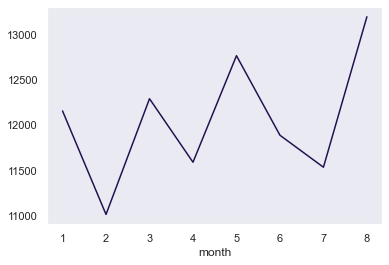

In [37]:
q1.plot()

### Note: The number of projects increased in (January, March, May, August).

### Note: The number of projects decreased in (February, April, June, July).

## SLA for tickets

<AxesSubplot:>

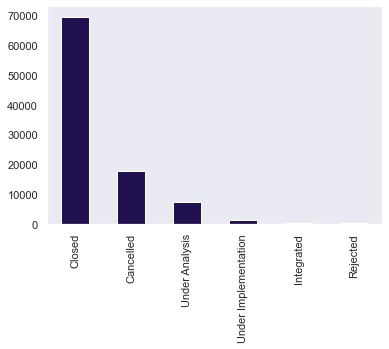

In [38]:
Engineering['Stage'].value_counts().plot(kind= 'bar')

In [39]:
Stages = Engineering.groupby('Stage')['Stage'].count()
Stages

Stage
Cancelled               17752
Closed                  69608
Integrated                384
Rejected                  192
Under Analysis           7340
Under Implementation     1152
Name: Stage, dtype: int64

In [40]:
Engineering.shape

(96428, 9)

In [41]:
print("Percentages of stages :" )
print("Percentages of closed projects =", round((69608/96428)*100 ,2))
print("Percentages of cancelled projects =", round((17752/96428)*100 ,2))
print("Percentages of Under Analysis projects =", round((7340/96428)*100 ,2))
print("Percentages of Under Implementation projects =", round((1152/96428)*100 ,2))
print("Percentages of Integrated projects =", round((384/96428)*100 ,2))
print("Percentages of Rejected projects =", round((192/96428)*100 ,2))

Percentages of stages :
Percentages of closed projects = 72.19
Percentages of cancelled projects = 18.41
Percentages of Under Analysis projects = 7.61
Percentages of Under Implementation projects = 1.19
Percentages of Integrated projects = 0.4
Percentages of Rejected projects = 0.2


### This largest percentage (72.19) indicates the completion of most projects, the quality of work and customer satisfaction, So this shows SLA for tickets.

# Defining very important KPIs

In [42]:
hours.head()

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Period_From,Period_To,Cost Rate,Department
0,1WK2855,Under Development,EG_02,20,2022_W27,9,24,2022_W24,2022_W42,33,Camera
1,1WK1339,Under Development,EG_02,28,2022_W26,12,14,2022_W24,2022_W42,33,Camera
2,1WK1418,Under Development,EG_02,3,2022_W30,21,12,2022_W24,2022_W42,33,Camera
3,1WK1304,Under Development,EG_02,28,2022_W25,19,30,2022_W24,2022_W42,33,Camera
4,1WK1376,Under Acquisition,EG_02,4,2022_W26,6,25,2022_W24,2022_W42,33,Camera


In [43]:
hours['Budget Cost']=hours['Budget Hours'] * hours['Cost Rate']
hours.head()

,Project Code,Project_Status,Calendar,Hours,Week,Forecasted hours,Budget Hours,Period_From,Period_To,Cost Rate,Department,Budget Cost
0,1WK2855,Under Development,EG_02,20,2022_W27,9,24,2022_W24,2022_W42,33,Camera,792
1,1WK1339,Under Development,EG_02,28,2022_W26,12,14,2022_W24,2022_W42,33,Camera,462
2,1WK1418,Under Development,EG_02,3,2022_W30,21,12,2022_W24,2022_W42,33,Camera,396
3,1WK1304,Under Development,EG_02,28,2022_W25,19,30,2022_W24,2022_W42,33,Camera,990
4,1WK1376,Under Acquisition,EG_02,4,2022_W26,6,25,2022_W24,2022_W42,33,Camera,825
